In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("C:\\Users\\INDIA\\Downloads\\Crop_Recommendation.csv")
data

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,Coffee


   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   f

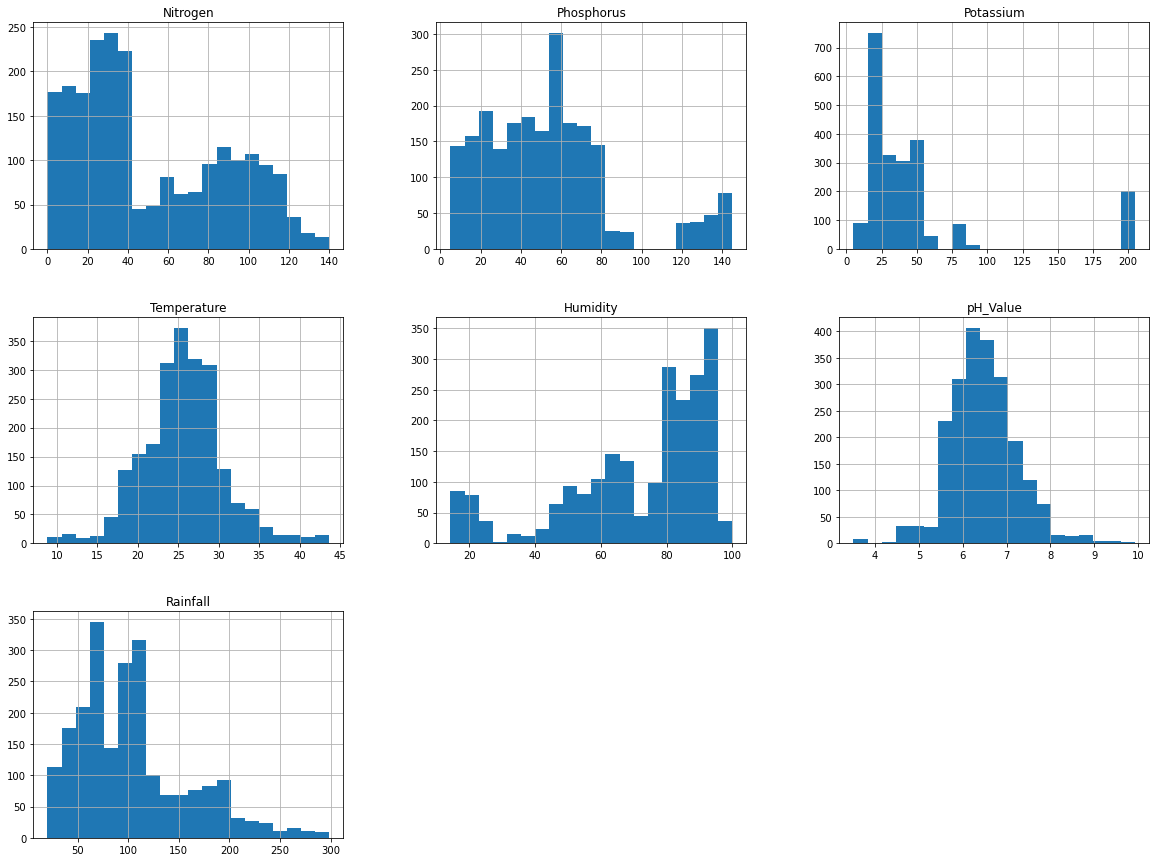

             Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  \
Nitrogen     1.000000   -0.231460  -0.140512     0.026504  0.190688  0.096683   
Phosphorus  -0.231460    1.000000   0.736232    -0.127541 -0.118734 -0.138019   
Potassium   -0.140512    0.736232   1.000000    -0.160387  0.190859 -0.169503   
Temperature  0.026504   -0.127541  -0.160387     1.000000  0.205320 -0.017795   
Humidity     0.190688   -0.118734   0.190859     0.205320  1.000000 -0.008483   
pH_Value     0.096683   -0.138019  -0.169503    -0.017795 -0.008483  1.000000   
Rainfall     0.059020   -0.063839  -0.053461    -0.030084  0.094423 -0.109069   

             Rainfall  
Nitrogen     0.059020  
Phosphorus  -0.063839  
Potassium   -0.053461  
Temperature -0.030084  
Humidity     0.094423  
pH_Value    -0.109069  
Rainfall     1.000000  


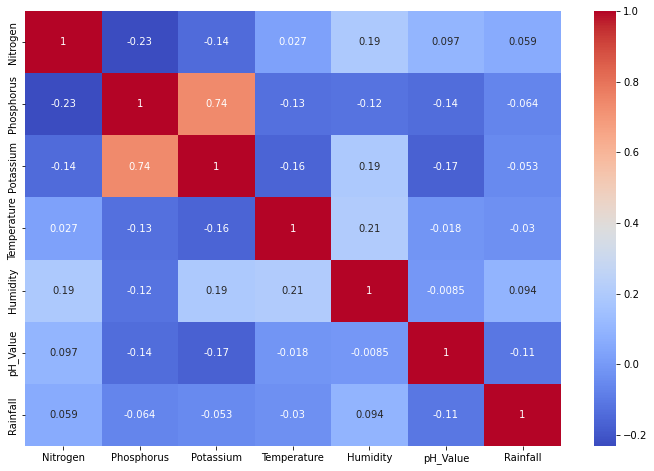

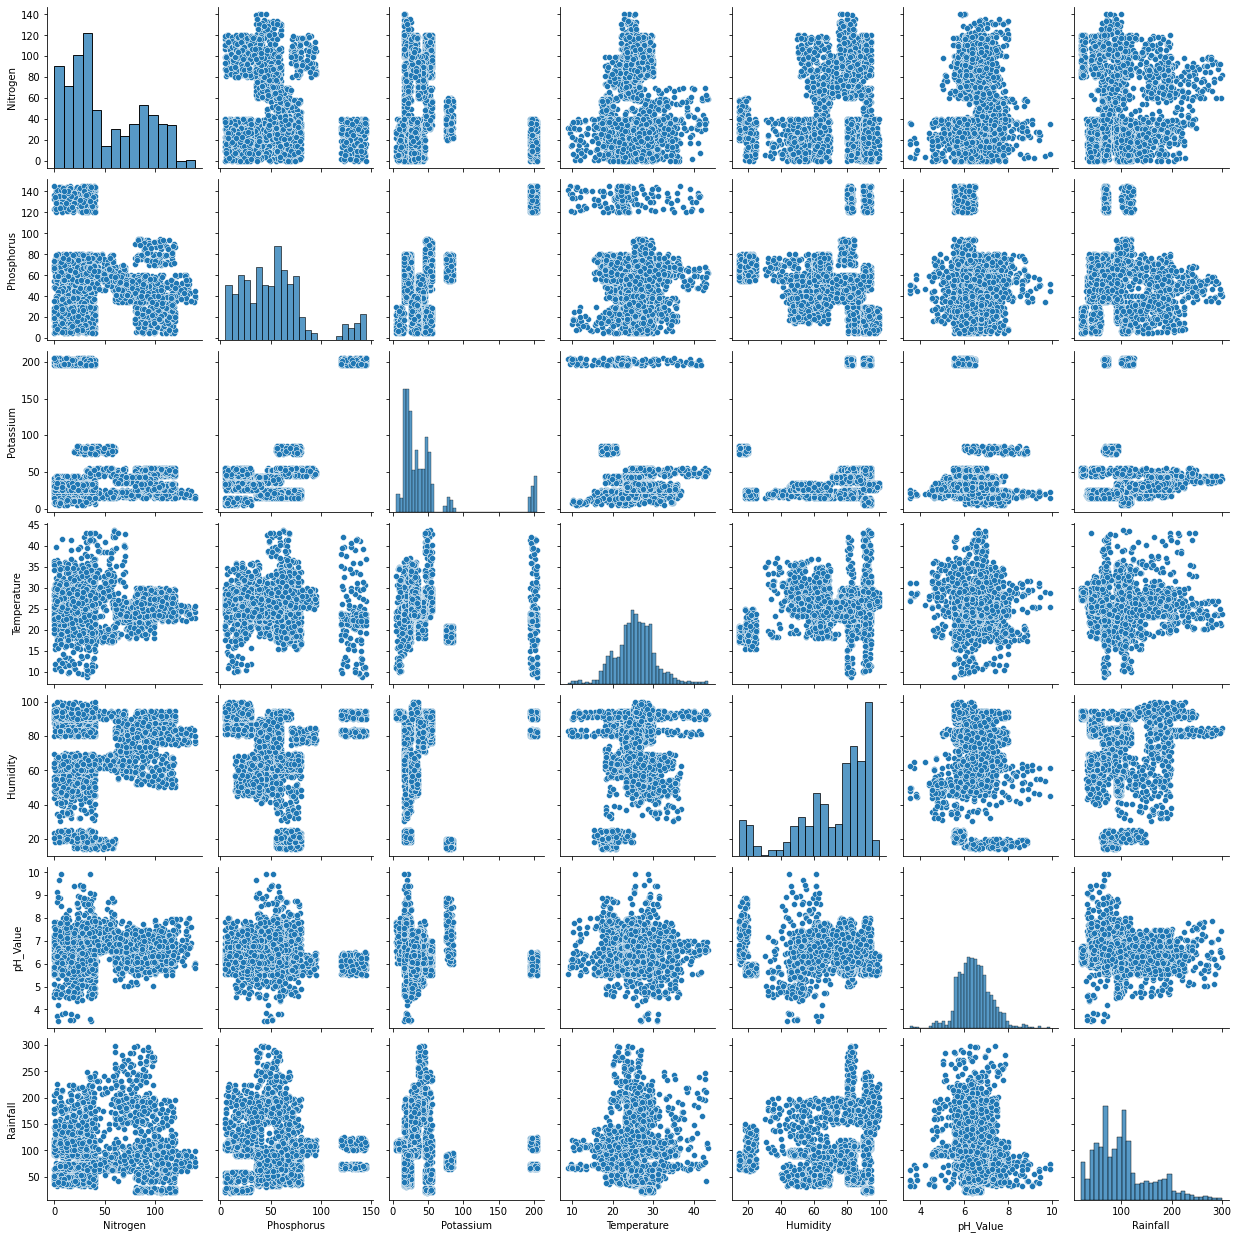

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display the first few rows
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Plotting histograms for each feature
data.hist(bins=20, figsize=(20, 15))
plt.show()

# Correlation matrix
corr_matrix = data.corr()
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Pairplot for visualizing relationships between variables
sns.pairplot(data)
plt.show()


   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207   
3        74          35         40    26.491096  80.158363  6.980401   
4        78          42         42    20.130175  81.604873  7.628473   

     Rainfall  Crop  
0  202.935536  Rice  
1  226.655537  Rice  
2  263.964248  Rice  
3  242.864034  Rice  
4  262.717340  Rice  
Column names: Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')
   Nitrogen  Phosphorus  Potassium  Temperature   Humidity  pH_Value  \
0        90          42         43    20.879744  82.002744  6.502985   
1        85          58         41    21.770462  80.319644  7.038096   
2        60          55         44    23.004459  82.320763  7.840207  

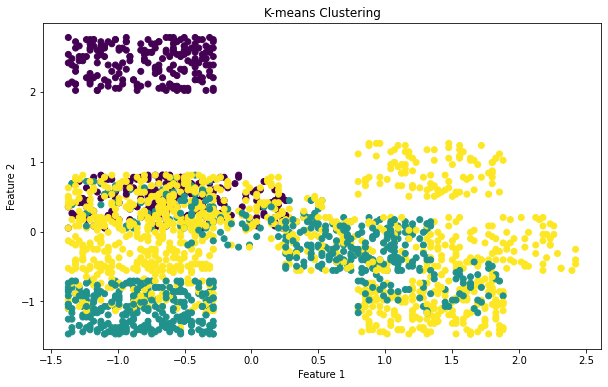

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
file_path = r'C:\\Users\\INDIA\\Downloads\\Crop_Recommendation.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Display the column names
print("Column names:", data.columns)

# Separate features (remove the target variable if present, and adjust this based on your actual dataset)
# Assuming the last column is the target variable
X = data.iloc[:, :-1]  # All columns except the last one
# If you don't have a target variable, just use the entire dataset as features
# X = data

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # You can change the number of clusters
kmeans.fit(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
print(data.head())

# Visualize the clusters (if the data has more than 2 features, consider using PCA for visualization)
plt.figure(figsize=(10, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [9]:
X=data.drop('Crop', axis = 1)
y=data['Crop']

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg):.2f}")
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression:
Accuracy: 0.96
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       0.90      0.95      0.93        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       0.94      1.00      0.97        17
      Cotton       0.94      1.00      0.97        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.83      0.87      0.85        23
 KidneyBeans       0.95      0.95      0.95        20
      Lentil       0.85      1.00      0.92        11
       Maize       1.00      0.95      0.98        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.92      0.96        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00  

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree.predict(X_test)

# Evaluate the model
print("Decision Tree:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_tree):.2f}")
print(classification_report(y_test, y_pred_tree))


Decision Tree:
Accuracy: 0.99
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       0.95      1.00      0.98        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       0.96      1.00      0.98        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      0.96      0.94        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      0.95      0.98        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.92      0.96        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00        

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

# Make predictions
y_pred_forest = forest.predict(X_test)

# Evaluate the model
print("Random Forest:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_forest):.2f}")
print(classification_report(y_test, y_pred_forest))


Random Forest:
Accuracy: 0.99
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      1.00      1.00        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       1.00      1.00      1.00        17
      Cotton       1.00      1.00      1.00        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.92      1.00      0.96        23
 KidneyBeans       1.00      1.00      1.00        20
      Lentil       0.92      1.00      0.96        11
       Maize       1.00      1.00      1.00        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.96      0.98        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00        

In [23]:
from sklearn.svm import SVC

# Initialize and train the SVM model
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Evaluate the model
print("Support Vector Machine:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(classification_report(y_test, y_pred_svm))


Support Vector Machine:
Accuracy: 0.97
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       1.00      0.95      0.97        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       0.94      1.00      0.97        17
      Cotton       0.94      1.00      0.97        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.78      0.91      0.84        23
 KidneyBeans       0.91      1.00      0.95        20
      Lentil       0.79      1.00      0.88        11
       Maize       1.00      0.95      0.98        21
       Mango       1.00      1.00      1.00        19
   MothBeans       1.00      0.92      0.96        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.0

In [25]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Evaluate the model
print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")
print(classification_report(y_test, y_pred_knn))


K-Nearest Neighbors:
Accuracy: 0.96
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        23
      Banana       1.00      1.00      1.00        21
   Blackgram       0.95      0.95      0.95        20
    ChickPea       1.00      1.00      1.00        26
     Coconut       1.00      1.00      1.00        27
      Coffee       0.94      1.00      0.97        17
      Cotton       0.89      1.00      0.94        17
      Grapes       1.00      1.00      1.00        14
        Jute       0.81      0.96      0.88        23
 KidneyBeans       0.91      1.00      0.95        20
      Lentil       0.69      1.00      0.81        11
       Maize       1.00      0.90      0.95        21
       Mango       0.90      1.00      0.95        19
   MothBeans       1.00      0.83      0.91        24
    MungBean       1.00      1.00      1.00        19
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.00  

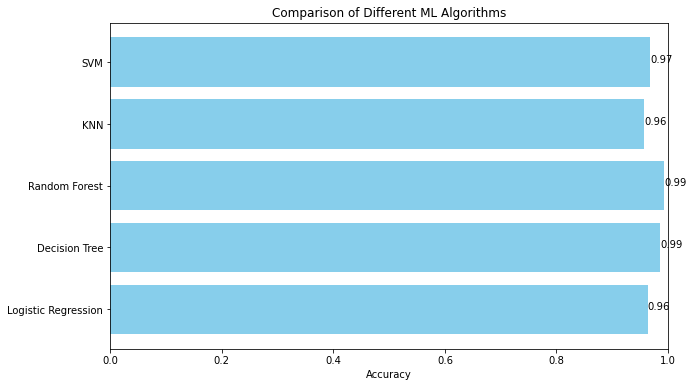

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy scores for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_tree),
    accuracy_score(y_test, y_pred_forest),
    accuracy_score(y_test, y_pred_knn),
    accuracy_score(y_test, y_pred_svm)
]

# Plot the results
plt.figure(figsize=(10, 6))
plt.barh(models, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Comparison of Different ML Algorithms')
plt.xlim(0, 1)
for index, value in enumerate(accuracies):
    plt.text(value, index, f'{value:.2f}')
plt.show()
